### [Introduction to Brian part 1](https://brian2.readthedocs.io/en/stable/resources/tutorials/1-intro-to-brian-neurons.html)

In [1]:
from brian2 import *

In [2]:
10*mV

10. * mvolt

In [3]:
# 10 *mV + 1 * uamp # error units do not match

In [21]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, method='exact')
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0.0
After v = 0.9999546000702376


In [22]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))


Expected value of v = 0.9999546000702375


In [23]:
### using volt for unit

In [28]:
start_scope()

tau = 10*ms
eqs_v = '''
dv/dt = (1*mV-v)/tau : volt
'''

G = NeuronGroup(1, eqs_v, method='exact')
G.v = 0.0 * mV
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0. V
After v = 0.9999546 mV


- [NeuronGroup](https://brian2.readthedocs.io/en/stable/reference/brian2.groups.neurongroup.NeuronGroup.html)
- **Look at** [Physical Units](https://brian2.readthedocs.io/en/stable/user/units.html)

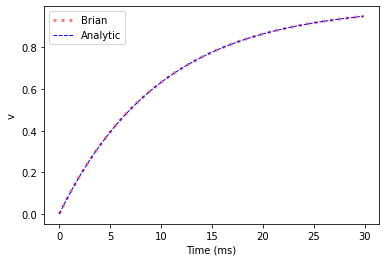

In [25]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)
run(30*ms)
plot(M.t/ms, M.v[0], label="Brian", lw=3, alpha=0.5, c="r", ls=":")
plot(M.t/ms, 1-exp(-M.t/tau), label='Analytic', c="b", lw=1, ls='--')
xlabel('Time (ms)')
ylabel('v')
legend();

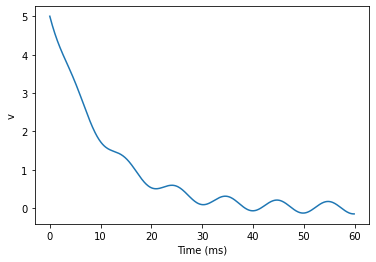

In [9]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''
# Change to Euler method because exact integrator doesn't work here
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=True)
G.v=5 #initial value

run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');


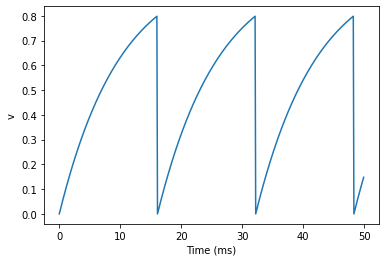

In [10]:
start_scope()


tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(1, eqs, 
                threshold='v>0.8', 
                reset='v = 0', 
                method='exact')
M = StateMonitor(G, 'v', record=True)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');


In [11]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')
spikemon = SpikeMonitor(G)
run(50*ms)

print('Spike times: %s' % spikemon.t[:])

Spike times: [16.  32.1 48.2] ms


In [12]:
print(type(spikemon.t[:][0]), spikemon.t[:][0])

<class 'brian2.units.fundamentalunits.Quantity'> 16. ms


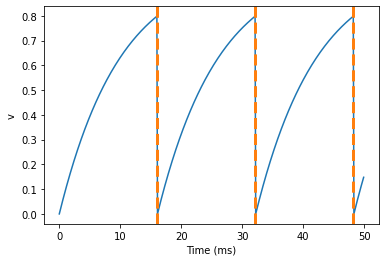

In [13]:
start_scope()

G = NeuronGroup(1, eqs, 
                threshold='v>0.8', 
                reset='v = 0', 
                method='exact')

statemon = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

### Refractoriness

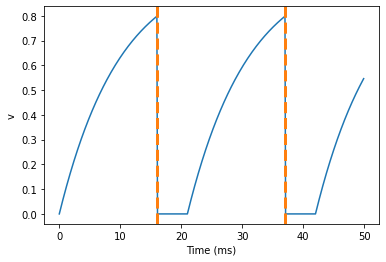

In [14]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, 
                threshold='v>0.8', 
                reset='v = 0', 
                refractory=5*ms, 
                method='exact')

statemon = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

Spike times: [ 8. 23. 38.] ms


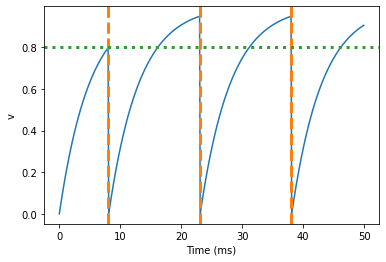

In [15]:
start_scope()

tau = 5*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, 
                threshold='v>0.8', 
                reset='v = 0', 
                refractory=15*ms, 
                method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
axhline(0.8, ls=':', c='C2', lw=3)
xlabel('Time (ms)')
ylabel('v')
print("Spike times: %s" % spikemon.t[:])

### Multiple neurons


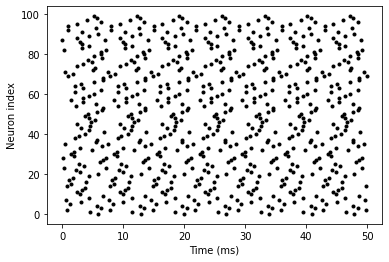

In [16]:
start_scope()

N = 100
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()'

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');


### Parameters

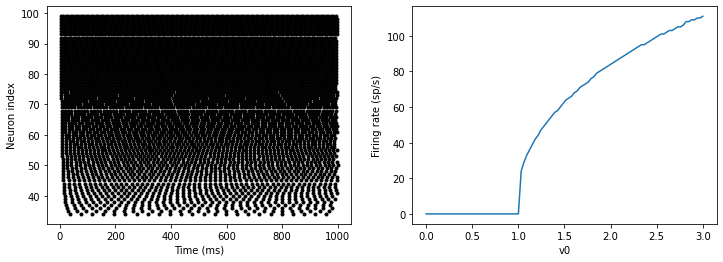

In [17]:
start_scope()
N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)
G.v0 = 'i*v0_max/(N-1)'
run(duration)
figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

### Stochastic neurons


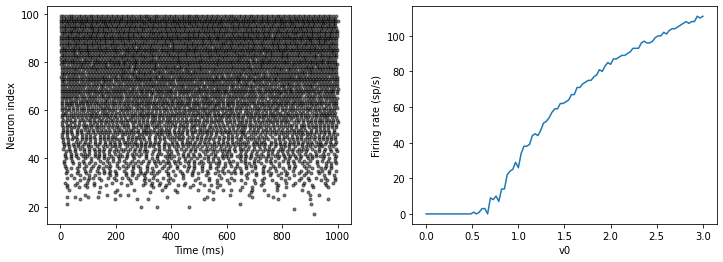

In [3]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, 
                eqs, 
                threshold='v>1', 
                reset='v=0', 
                refractory=5*ms, 
                method='euler')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k', alpha=0.5)
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

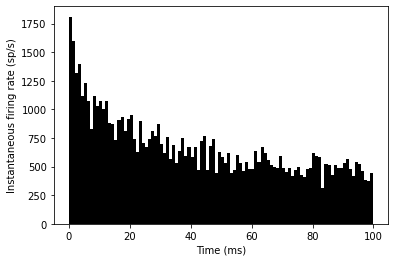

In [19]:
start_scope()

N = 1000
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 100*ms


eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''
G = NeuronGroup(N, eqs, threshold='v>vt',
               reset=reset,
               refractory=5*ms,
               method='euler')

spikemon = SpikeMonitor(G)
G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', 
         weights=ones(len(spikemon))/(N*defaultclock.dt))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');